In [1]:
import pandas as pd
from datetime import datetime
# Set Pandas options to display all columns
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None) 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
df = pd.read_csv('Metadata_Sentiment_Topic.csv')
cnn_df =pd.read_csv('ImageCNNResults (1).csv')
top_ana = pd.read_csv('image_topic_analysis.csv')
df3 = pd.read_csv('Video_Details_2.csv')
audio_df = pd.read_csv('audio_emotion_percentages.csv')

In [3]:
df.head(1) #done

,channel_name,subscriber_count,video_id,video_title,published_datetime,duration,view_count,like_count,dislike_count,comment_count,description,thumbnail_url,class,transcript,hook,title_sentiment,transcript_sentiment,hook_sentiment,tt_1_genimpressions,tt_2_tvs_streaming,tt_3_wearables,tt_4_audio_accessories,tt_5_iphone_cameras
0,@Mrwhosetheboss,20200000,neIYdLysqlk,I tested the Craziest Xiaomi Gadgets!,2024-11-13T12:04:54Z,PT27M53S,6679521,219704,0,8890,I'm still genuinely in shock how great some of...,https://i.ytimg.com/vi/neIYdLysqlk/hqdefault.jpg,Diamond,you probably know xiaomi for their suspiciousl...,you probably know xiaomi for their suspiciousl...,-0.126,1.0,0.9598,0.781448,0.0,0.150271,0.068281,0.0


In [4]:
top_ana.head(1) #done

,video_id,i_Portraits_Outdoor,i_Office_Desk_Items,i_Electronics_Repair,i_Laptops_Workstations,i_UI_Digital_Screens,i_Men_Accessories,i_Smartwatches_Devices,i_Tablet_Gaming,i_Smartphones_Handling,i_Handheld_Gadgets,i_Landscape_Decor
0,neIYdLysqlk,0.144373,0.111729,0.049618,0.007595,0.074713,0.110112,0.009071,0.029046,0.087018,0.318479,0.058245


In [5]:
audio_df.head(1) #Done

,video_name,video_id,neutral_percent,happy_percent,sad_percent,angry_percent
0,AirPods 4 vs AirPods 4 Noise Cancellation,_ybbXIksjUk,0.76,0.12,0.0,0.12


# Cnn

In [6]:
cnn_df = cnn_df.drop(columns=['Unnamed: 0', 'timestamp'])
cnn_df.head(2)

,brightness,color1,color2,color3,feature1,feature2,video_name,brightness.1,color1.1,color2.1,color3.1,feature1.1,feature2.1,brightness color1,brightness color2,brightness color3,brightness feature1,brightness feature2,color1 color2,color1 color3,color1 feature1,color1 feature2,color2 color3,color2 feature1,color2 feature2,color3 feature1,color3 feature2,feature1 feature2
0,-2.340197,-0.114898,-0.117014,-0.116854,-0.416758,-0.066466,1OHZTFseggA.mp4,-2.340197,-0.114898,-0.117014,-0.116854,-0.416758,-0.066466,0.268885,0.273835,0.273461,0.975296,0.155543,0.013445,0.013426,0.047885,0.007637,0.013673,0.048766,0.007777,0.048700,0.007767,0.027700
1,0.795143,-0.114409,-0.116498,-0.116314,1.254216,1.102492,1OHZTFseggA.mp4,0.795143,-0.114409,-0.116498,-0.116314,1.254216,1.102492,-0.090972,-0.092633,-0.092486,0.997282,0.876639,0.013328,0.013307,-0.143494,-0.126135,0.013550,-0.146114,-0.128438,-0.145882,-0.128235,1.382764


In [7]:
# Extract 1OHZTFseggA from video_name
cnn_df['video_name'] = cnn_df['video_name'].str.split('.').str[0]
cnn_df.head(3)

,brightness,color1,color2,color3,feature1,feature2,video_name,brightness.1,color1.1,color2.1,color3.1,feature1.1,feature2.1,brightness color1,brightness color2,brightness color3,brightness feature1,brightness feature2,color1 color2,color1 color3,color1 feature1,color1 feature2,color2 color3,color2 feature1,color2 feature2,color3 feature1,color3 feature2,feature1 feature2
0,-2.340197,-0.114898,-0.117014,-0.116854,-0.416758,-0.066466,1OHZTFseggA,-2.340197,-0.114898,-0.117014,-0.116854,-0.416758,-0.066466,0.268885,0.273835,0.273461,0.975296,0.155543,0.013445,0.013426,0.047885,0.007637,0.013673,0.048766,0.007777,0.048700,0.007767,0.027700
1,0.795143,-0.114409,-0.116498,-0.116314,1.254216,1.102492,1OHZTFseggA,0.795143,-0.114409,-0.116498,-0.116314,1.254216,1.102492,-0.090972,-0.092633,-0.092486,0.997282,0.876639,0.013328,0.013307,-0.143494,-0.126135,0.013550,-0.146114,-0.128438,-0.145882,-0.128235,1.382764
2,1.745878,-0.114421,-0.116446,-0.116215,0.130251,-2.071296,1OHZTFseggA,1.745878,-0.114421,-0.116446,-0.116215,0.130251,-2.071296,-0.199765,-0.203301,-0.202897,0.227403,-3.616231,0.013324,0.013297,-0.014903,0.236999,0.013533,-0.015167,0.241195,-0.015137,0.240715,-0.269789


In [8]:
# Group by 'video_name' and aggregate features (e.g., take the mean of each)
cnn_agg = cnn_df.groupby('video_name').mean().reset_index()
cnn_agg.head()

,video_name,brightness,color1,color2,color3,feature1,feature2,brightness.1,color1.1,color2.1,color3.1,feature1.1,feature2.1,brightness color1,brightness color2,brightness color3,brightness feature1,brightness feature2,color1 color2,color1 color3,color1 feature1,color1 feature2,color2 color3,color2 feature1,color2 feature2,color3 feature1,color3 feature2,feature1 feature2
0,1OHZTFseggA,0.308796,-0.114414,-0.116521,-0.116305,-5.585158e-08,-6.135099e-08,0.308796,-0.114414,-0.116521,-0.116305,-5.585158e-08,-6.135099e-08,-0.035259,-0.035927,-0.035863,0.268218,-0.151672,0.013332,0.013307,0.000018,-0.000009,0.013552,0.000011,0.000003,-0.000013,0.000016,-9.317918e-08
1,1rJa-0YOkwk,-0.616967,-0.114470,-0.116640,-0.116403,-7.721265e-08,1.403589e-08,-0.616967,-0.114470,-0.116640,-0.116403,-7.721265e-08,1.403589e-08,0.070645,0.071995,0.071853,-0.257504,-0.378046,0.013352,0.013325,-0.000050,-0.000034,0.013577,-0.000037,-0.000032,0.000016,-0.000016,1.747349e-07
2,2VK_awDJ_ss,-1.094416,0.204205,0.229604,0.234490,3.441614e-08,-1.397807e-07,-1.094416,0.204205,0.229604,0.234490,3.441614e-08,-1.397807e-07,-0.705846,-0.775224,-0.787748,-1.477944,0.083550,2.695382,2.732600,1.214082,0.261814,2.969933,1.318727,0.284365,1.336769,0.288279,-1.195157e-07
3,4RcThoRG46c,-0.438078,-0.114436,-0.116582,-0.116387,-2.897799e-08,1.918911e-07,-0.438078,-0.114436,-0.116582,-0.116387,-2.897799e-08,1.918911e-07,0.050157,0.051096,0.051012,-0.357659,-1.813017,0.013341,0.013319,-0.000001,-0.000060,0.013569,0.000004,-0.000057,-0.000030,-0.000021,-4.644337e-07
4,4wHkhxit_sU,-0.295228,0.142527,0.138338,0.158510,-4.462964e-08,1.896152e-08,-0.295228,0.142527,0.138338,0.158510,-4.462964e-08,1.896152e-08,-0.636477,-0.630432,-0.682589,-1.129264,0.000853,1.592059,1.718135,2.769321,0.007662,1.703762,2.746928,0.007602,2.962164,0.008192,-6.774944e-08


In [9]:
#change name from video_name to video_id
cnn_agg.rename(columns={'video_name': 'video_id'}, inplace=True)
cnn_agg.head()

,video_id,brightness,color1,color2,color3,feature1,feature2,brightness.1,color1.1,color2.1,color3.1,feature1.1,feature2.1,brightness color1,brightness color2,brightness color3,brightness feature1,brightness feature2,color1 color2,color1 color3,color1 feature1,color1 feature2,color2 color3,color2 feature1,color2 feature2,color3 feature1,color3 feature2,feature1 feature2
0,1OHZTFseggA,0.308796,-0.114414,-0.116521,-0.116305,-5.585158e-08,-6.135099e-08,0.308796,-0.114414,-0.116521,-0.116305,-5.585158e-08,-6.135099e-08,-0.035259,-0.035927,-0.035863,0.268218,-0.151672,0.013332,0.013307,0.000018,-0.000009,0.013552,0.000011,0.000003,-0.000013,0.000016,-9.317918e-08
1,1rJa-0YOkwk,-0.616967,-0.114470,-0.116640,-0.116403,-7.721265e-08,1.403589e-08,-0.616967,-0.114470,-0.116640,-0.116403,-7.721265e-08,1.403589e-08,0.070645,0.071995,0.071853,-0.257504,-0.378046,0.013352,0.013325,-0.000050,-0.000034,0.013577,-0.000037,-0.000032,0.000016,-0.000016,1.747349e-07
2,2VK_awDJ_ss,-1.094416,0.204205,0.229604,0.234490,3.441614e-08,-1.397807e-07,-1.094416,0.204205,0.229604,0.234490,3.441614e-08,-1.397807e-07,-0.705846,-0.775224,-0.787748,-1.477944,0.083550,2.695382,2.732600,1.214082,0.261814,2.969933,1.318727,0.284365,1.336769,0.288279,-1.195157e-07
3,4RcThoRG46c,-0.438078,-0.114436,-0.116582,-0.116387,-2.897799e-08,1.918911e-07,-0.438078,-0.114436,-0.116582,-0.116387,-2.897799e-08,1.918911e-07,0.050157,0.051096,0.051012,-0.357659,-1.813017,0.013341,0.013319,-0.000001,-0.000060,0.013569,0.000004,-0.000057,-0.000030,-0.000021,-4.644337e-07
4,4wHkhxit_sU,-0.295228,0.142527,0.138338,0.158510,-4.462964e-08,1.896152e-08,-0.295228,0.142527,0.138338,0.158510,-4.462964e-08,1.896152e-08,-0.636477,-0.630432,-0.682589,-1.129264,0.000853,1.592059,1.718135,2.769321,0.007662,1.703762,2.746928,0.007602,2.962164,0.008192,-6.774944e-08


# Merging

In [10]:
#Merge all data frames but df3
merge1 = pd.merge(df, top_ana, on='video_id', how='inner')
merge1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   channel_name            45 non-null     object 
 1   subscriber_count        45 non-null     int64  
 2   video_id                45 non-null     object 
 3   video_title             45 non-null     object 
 4   published_datetime      45 non-null     object 
 5   duration                45 non-null     object 
 6   view_count              45 non-null     int64  
 7   like_count              45 non-null     int64  
 8   dislike_count           45 non-null     int64  
 9   comment_count           45 non-null     int64  
 10  description             45 non-null     object 
 11  thumbnail_url           45 non-null     object 
 12  class                   45 non-null     object 
 13  transcript              45 non-null     object 
 14  hook                    45 non-null     obje

In [11]:
merge2 = pd.merge(merge1, audio_df, on='video_id', how='inner')
merge2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   channel_name            45 non-null     object 
 1   subscriber_count        45 non-null     int64  
 2   video_id                45 non-null     object 
 3   video_title             45 non-null     object 
 4   published_datetime      45 non-null     object 
 5   duration                45 non-null     object 
 6   view_count              45 non-null     int64  
 7   like_count              45 non-null     int64  
 8   dislike_count           45 non-null     int64  
 9   comment_count           45 non-null     int64  
 10  description             45 non-null     object 
 11  thumbnail_url           45 non-null     object 
 12  class                   45 non-null     object 
 13  transcript              45 non-null     object 
 14  hook                    45 non-null     obje

In [12]:
merge3 = pd.merge(merge2, cnn_agg, on='video_id', how='inner')
merge3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 66 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   channel_name            45 non-null     object 
 1   subscriber_count        45 non-null     int64  
 2   video_id                45 non-null     object 
 3   video_title             45 non-null     object 
 4   published_datetime      45 non-null     object 
 5   duration                45 non-null     object 
 6   view_count              45 non-null     int64  
 7   like_count              45 non-null     int64  
 8   dislike_count           45 non-null     int64  
 9   comment_count           45 non-null     int64  
 10  description             45 non-null     object 
 11  thumbnail_url           45 non-null     object 
 12  class                   45 non-null     object 
 13  transcript              45 non-null     object 
 14  hook                    45 non-null     obje

# Drop Unnecesary columns and data wrangling

In [13]:
data = merge3

In [14]:
#Create the target variable (popularity)
data['popularity'] = (0.5 * data['view_count'] + 0.3 * data['like_count'] + 0.2 * data['comment_count']) / data['subscriber_count']

In [15]:
#Generate ratios
data['likes_per_view'] = data['like_count'] / data['view_count']
data['comments_per_view'] = data['comment_count'] / data['view_count']

In [16]:
columns_to_drop = [
    'channel_name',  # Irrelevant column
    'dislike_count',  # Irrelevant column
    'view_count', 'like_count', 'comment_count', 'subscriber_count'  # Used to create 'popularity'
]

In [17]:
# Drop specified columns
data = data.drop(columns=columns_to_drop)

In [18]:
#Convert duration from ISO 8601 format (PT##H##M##S) to total seconds
def iso_duration_to_seconds(duration):
    import re
    pattern = re.compile(r'PT(?:(\d+)H)?(?:(\d+)M)?(?:(\d+)S)?')
    match = pattern.match(duration)
    if match:
        hours, minutes, seconds = match.groups()
        return int(hours or 0) * 3600 + int(minutes or 0) * 60 + int(seconds or 0)
    return 0

data['duration_seconds'] = data['duration'].apply(iso_duration_to_seconds)

In [19]:
#Extract temporal features from `published_datetime`
data['published_datetime'] = pd.to_datetime(data['published_datetime'])
data['published_month'] = data['published_datetime'].dt.month
data['published_day'] = data['published_datetime'].dt.day
data['published_hour'] = data['published_datetime'].dt.hour

In [20]:
def iso_duration_to_decimal_minutes(duration):
    import re
    # Regular expression to match ISO 8601 duration
    pattern = re.compile(r'PT(?:(\d+)H)?(?:(\d+)M)?(?:(\d+)S)?')
    match = pattern.match(duration)
    if match:
        hours, minutes, seconds = match.groups()
        # Convert to decimal minutes
        total_minutes = int(hours or 0) * 60 + int(minutes or 0) + int(seconds or 0) / 60
        return total_minutes
    return 0

In [21]:
# Apply the function to the 'duration' column
data['duration_decimal_minutes'] = data['duration'].apply(iso_duration_to_decimal_minutes)

In [22]:
#Drop irrelevant columns
columns_to_drop = ['video_title', 'transcript', 'hook', 'published_datetime', 'duration', 'description', 'thumbnail_url']
data = data.drop(columns=columns_to_drop)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 61 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   video_id                  45 non-null     object 
 1   class                     45 non-null     object 
 2   title_sentiment           45 non-null     float64
 3   transcript_sentiment      45 non-null     float64
 4   hook_sentiment            45 non-null     float64
 5   tt_1_genimpressions       45 non-null     float64
 6   tt_2_tvs_streaming        45 non-null     float64
 7   tt_3_wearables            45 non-null     float64
 8   tt_4_audio_accessories    45 non-null     float64
 9   tt_5_iphone_cameras       45 non-null     float64
 10  i_Portraits_Outdoor       45 non-null     float64
 11  i_Office_Desk_Items       45 non-null     float64
 12  i_Electronics_Repair      45 non-null     float64
 13  i_Laptops_Workstations    45 non-null     float64
 14  i_UI_Digital

# feature Selection

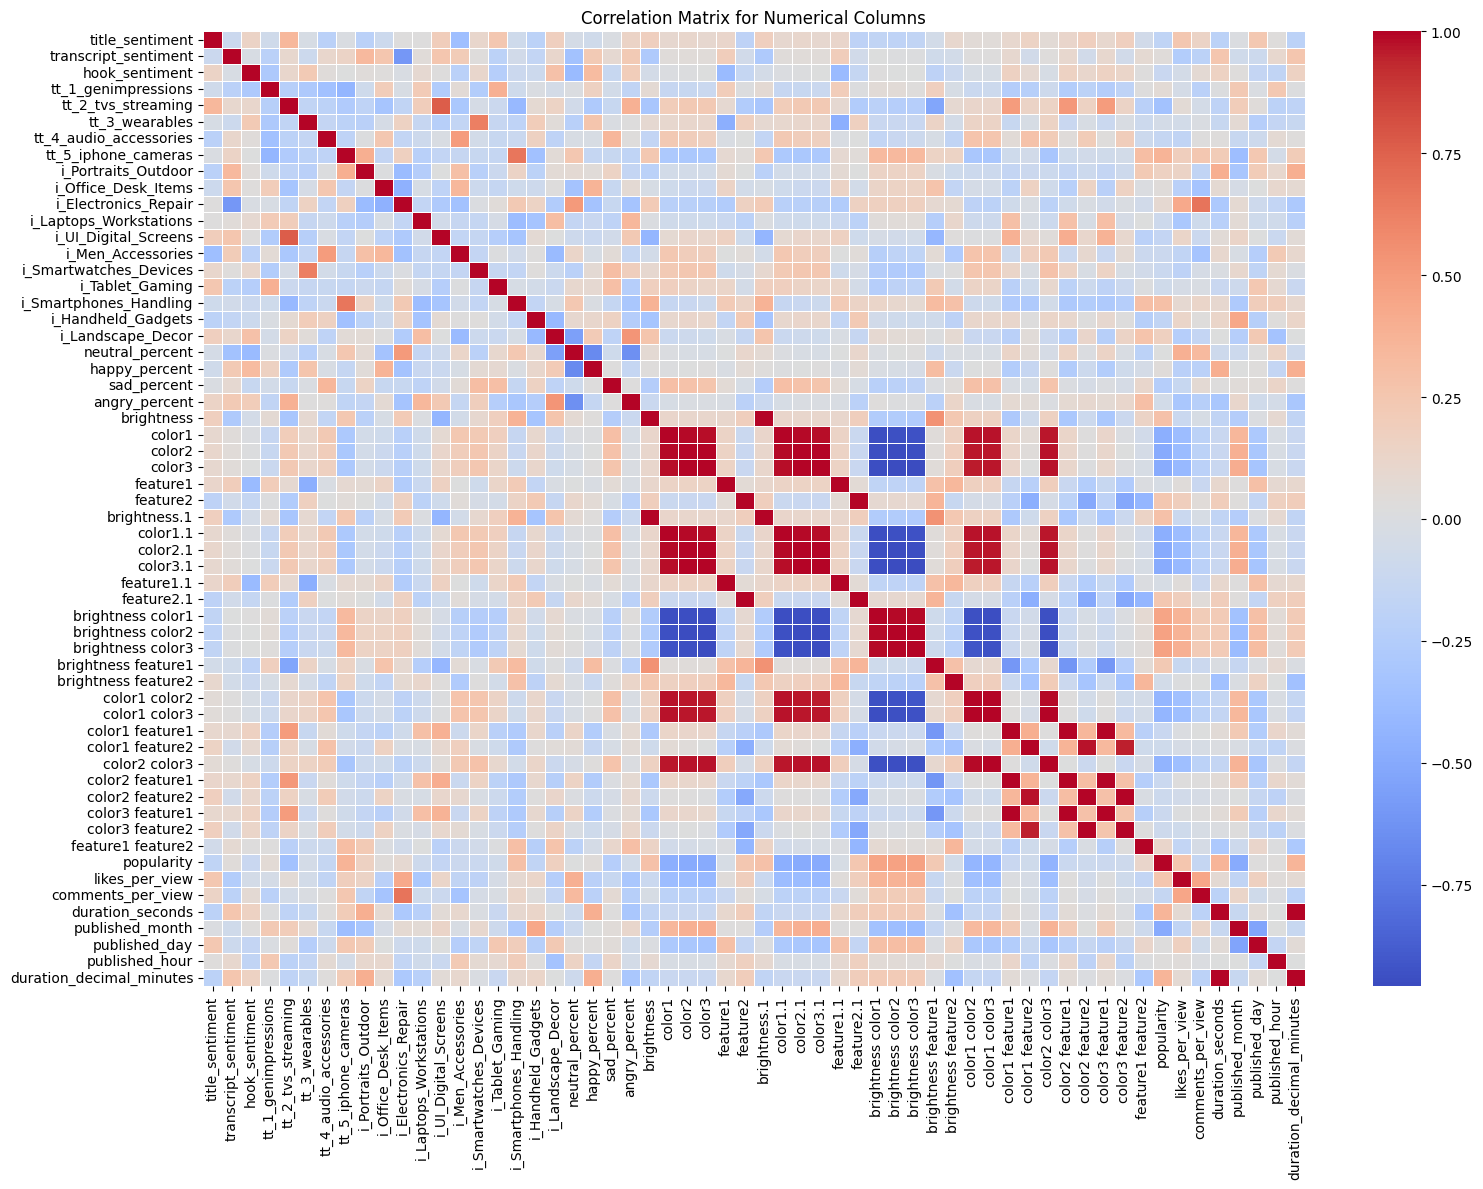

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
# Select only numerical columns (from your list)
numerical_columns = [
    "title_sentiment", "transcript_sentiment", "hook_sentiment",
    "tt_1_genimpressions", "tt_2_tvs_streaming", "tt_3_wearables",
    "tt_4_audio_accessories", "tt_5_iphone_cameras", "i_Portraits_Outdoor",
    "i_Office_Desk_Items", "i_Electronics_Repair", "i_Laptops_Workstations",
    "i_UI_Digital_Screens", "i_Men_Accessories", "i_Smartwatches_Devices",
    "i_Tablet_Gaming", "i_Smartphones_Handling", "i_Handheld_Gadgets",
    "i_Landscape_Decor", "neutral_percent", "happy_percent",
    "sad_percent", "angry_percent", "brightness", "color1", "color2", "color3",
    "feature1", "feature2", "brightness.1", "color1.1", "color2.1", "color3.1",
    "feature1.1", "feature2.1", "brightness color1", "brightness color2",
    "brightness color3", "brightness feature1", "brightness feature2",
    "color1 color2", "color1 color3", "color1 feature1", "color1 feature2",
    "color2 color3", "color2 feature1", "color2 feature2", "color3 feature1",
    "color3 feature2", "feature1 feature2", "popularity", "likes_per_view",
    "comments_per_view", "duration_seconds", "published_month",
    "published_day", "published_hour", "duration_decimal_minutes"
]

# Calculate the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Columns')
plt.tight_layout()
plt.show()



In [25]:
# Identify features with high correlation (absolute value > 0.9)
correlation_threshold = 0.8
high_corr = correlation_matrix.abs() > correlation_threshold

# Drop redundant features
to_drop = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if high_corr.iloc[i, j]:
            to_drop.add(correlation_matrix.columns[i])

# Filter the DataFrame
reduced_data = data.drop(columns=list(to_drop))
print(f"Reduced to {len(reduced_data.columns)} features after removing highly correlated ones.")


Reduced to 42 features after removing highly correlated ones.


In [26]:
reduced_data.head()

,video_id,class,title_sentiment,transcript_sentiment,hook_sentiment,tt_1_genimpressions,tt_2_tvs_streaming,tt_3_wearables,tt_4_audio_accessories,tt_5_iphone_cameras,i_Portraits_Outdoor,i_Office_Desk_Items,i_Electronics_Repair,i_Laptops_Workstations,i_UI_Digital_Screens,i_Men_Accessories,i_Smartwatches_Devices,i_Tablet_Gaming,i_Smartphones_Handling,i_Handheld_Gadgets,i_Landscape_Decor,video_name,neutral_percent,happy_percent,sad_percent,angry_percent,brightness,color1,feature1,feature2,brightness feature1,brightness feature2,color1 feature1,color1 feature2,feature1 feature2,popularity,likes_per_view,comments_per_view,duration_seconds,published_month,published_day,published_hour
0,neIYdLysqlk,Diamond,-0.1260,1.0000,0.9598,0.781448,0.000000,0.150271,0.068281,0.000000,0.144373,0.111729,0.049618,0.007595,0.074713,0.110112,0.009071,0.029046,0.087018,0.318479,0.058245,I tested the Craziest Xiaomi Gadgets!,0.12,0.88,0.00,0.00,-0.239770,-0.114429,-3.876273e-09,1.540517e-08,0.418041,-0.074074,0.000003,-0.000009,-9.538513e-08,0.168686,0.032892,0.001331,1673,11,13,12
1,YX8ks42Azn8,Diamond,-0.4019,0.9999,-0.8691,0.912694,0.000000,0.000000,0.000000,0.087306,0.175335,0.099880,0.040972,0.010550,0.099863,0.051743,0.019642,0.084691,0.146995,0.250905,0.019425,The TRIPLE FOLDING phone has a Problem.,0.72,0.12,0.04,0.12,-1.169372,-0.114464,4.721309e-08,-3.161653e-08,-0.319212,0.004220,0.000016,0.000017,-9.732528e-09,0.087461,0.032256,0.001712,774,10,26,14
2,4RcThoRG46c,Diamond,0.0000,1.0000,0.9552,0.708494,0.023958,0.064661,0.202886,0.000000,0.140951,0.194708,0.034888,0.043597,0.178386,0.132647,0.009894,0.041346,0.025141,0.166527,0.031916,I tested every Celebrity Tech product!,0.40,0.60,0.00,0.00,-0.438078,-0.114436,-2.897799e-08,1.918911e-07,-0.357659,-1.813017,-0.000001,-0.000060,-4.644337e-07,0.148169,0.031592,0.001008,1635,10,5,10
3,vSIbvJB4WdI,Diamond,-0.4389,0.9999,0.7184,0.050387,0.020822,0.028909,0.020463,0.879418,0.327336,0.044627,0.013596,0.006036,0.240204,0.122107,0.016070,0.020679,0.123044,0.068881,0.017420,iPhone 16 Pro Max vs Samsung S24 Ultra Camera ...,0.84,0.04,0.00,0.12,-0.452847,-0.091420,-1.647635e-08,-4.606061e-08,-0.604829,0.016561,-0.022457,-0.001867,1.131000e-07,0.097184,0.030142,0.002801,1004,9,19,11
4,cRPBp2tRxFY,Diamond,0.0000,0.9999,0.6124,0.124643,0.013059,0.000000,0.117100,0.745198,0.195492,0.107757,0.014325,0.030166,0.120749,0.097365,0.013171,0.024163,0.245295,0.113471,0.038047,iPhone 16 / 16 Pro Unboxing - Testing every ne...,0.80,0.08,0.00,0.12,-0.659880,-0.098710,2.388327e-08,4.298733e-09,-0.260476,0.232781,-0.010035,0.004450,3.702941e-08,0.108197,0.029148,0.001974,1300,9,18,12


In [27]:
# Dummy class column and drop original
reduced_data = pd.get_dummies(reduced_data, columns=['class'])
reduced_data.head()

,video_id,title_sentiment,transcript_sentiment,hook_sentiment,tt_1_genimpressions,tt_2_tvs_streaming,tt_3_wearables,tt_4_audio_accessories,tt_5_iphone_cameras,i_Portraits_Outdoor,i_Office_Desk_Items,i_Electronics_Repair,i_Laptops_Workstations,i_UI_Digital_Screens,i_Men_Accessories,i_Smartwatches_Devices,i_Tablet_Gaming,i_Smartphones_Handling,i_Handheld_Gadgets,i_Landscape_Decor,video_name,neutral_percent,happy_percent,sad_percent,angry_percent,brightness,color1,feature1,feature2,brightness feature1,brightness feature2,color1 feature1,color1 feature2,feature1 feature2,popularity,likes_per_view,comments_per_view,duration_seconds,published_month,published_day,published_hour,class_Diamond,class_Gold,class_Silver
0,neIYdLysqlk,-0.1260,1.0000,0.9598,0.781448,0.000000,0.150271,0.068281,0.000000,0.144373,0.111729,0.049618,0.007595,0.074713,0.110112,0.009071,0.029046,0.087018,0.318479,0.058245,I tested the Craziest Xiaomi Gadgets!,0.12,0.88,0.00,0.00,-0.239770,-0.114429,-3.876273e-09,1.540517e-08,0.418041,-0.074074,0.000003,-0.000009,-9.538513e-08,0.168686,0.032892,0.001331,1673,11,13,12,True,False,False
1,YX8ks42Azn8,-0.4019,0.9999,-0.8691,0.912694,0.000000,0.000000,0.000000,0.087306,0.175335,0.099880,0.040972,0.010550,0.099863,0.051743,0.019642,0.084691,0.146995,0.250905,0.019425,The TRIPLE FOLDING phone has a Problem.,0.72,0.12,0.04,0.12,-1.169372,-0.114464,4.721309e-08,-3.161653e-08,-0.319212,0.004220,0.000016,0.000017,-9.732528e-09,0.087461,0.032256,0.001712,774,10,26,14,True,False,False
2,4RcThoRG46c,0.0000,1.0000,0.9552,0.708494,0.023958,0.064661,0.202886,0.000000,0.140951,0.194708,0.034888,0.043597,0.178386,0.132647,0.009894,0.041346,0.025141,0.166527,0.031916,I tested every Celebrity Tech product!,0.40,0.60,0.00,0.00,-0.438078,-0.114436,-2.897799e-08,1.918911e-07,-0.357659,-1.813017,-0.000001,-0.000060,-4.644337e-07,0.148169,0.031592,0.001008,1635,10,5,10,True,False,False
3,vSIbvJB4WdI,-0.4389,0.9999,0.7184,0.050387,0.020822,0.028909,0.020463,0.879418,0.327336,0.044627,0.013596,0.006036,0.240204,0.122107,0.016070,0.020679,0.123044,0.068881,0.017420,iPhone 16 Pro Max vs Samsung S24 Ultra Camera ...,0.84,0.04,0.00,0.12,-0.452847,-0.091420,-1.647635e-08,-4.606061e-08,-0.604829,0.016561,-0.022457,-0.001867,1.131000e-07,0.097184,0.030142,0.002801,1004,9,19,11,True,False,False
4,cRPBp2tRxFY,0.0000,0.9999,0.6124,0.124643,0.013059,0.000000,0.117100,0.745198,0.195492,0.107757,0.014325,0.030166,0.120749,0.097365,0.013171,0.024163,0.245295,0.113471,0.038047,iPhone 16 / 16 Pro Unboxing - Testing every ne...,0.80,0.08,0.00,0.12,-0.659880,-0.098710,2.388327e-08,4.298733e-09,-0.260476,0.232781,-0.010035,0.004450,3.702941e-08,0.108197,0.029148,0.001974,1300,9,18,12,True,False,False


In [28]:
reduced_data = reduced_data.drop(columns=['video_name'])

In [29]:
reduced_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                45 non-null     object 
 1   title_sentiment         45 non-null     float64
 2   transcript_sentiment    45 non-null     float64
 3   hook_sentiment          45 non-null     float64
 4   tt_1_genimpressions     45 non-null     float64
 5   tt_2_tvs_streaming      45 non-null     float64
 6   tt_3_wearables          45 non-null     float64
 7   tt_4_audio_accessories  45 non-null     float64
 8   tt_5_iphone_cameras     45 non-null     float64
 9   i_Portraits_Outdoor     45 non-null     float64
 10  i_Office_Desk_Items     45 non-null     float64
 11  i_Electronics_Repair    45 non-null     float64
 12  i_Laptops_Workstations  45 non-null     float64
 13  i_UI_Digital_Screens    45 non-null     float64
 14  i_Men_Accessories       45 non-null     floa

# EDA

In [30]:
data = reduced_data

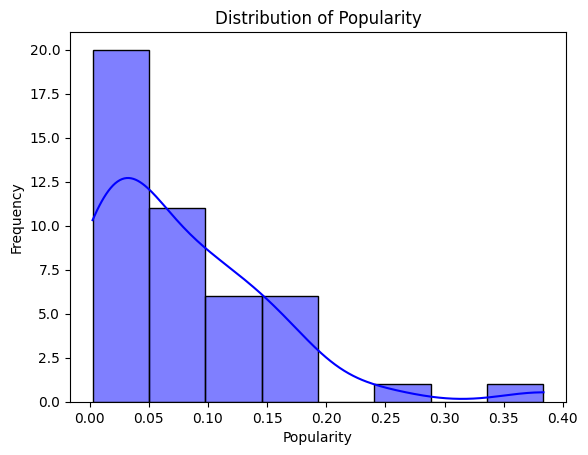

In [31]:
sns.histplot(data['popularity'], kde=True, color='blue')
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

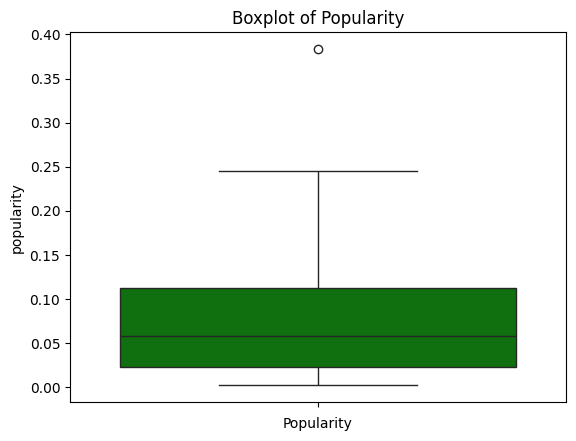

In [32]:
sns.boxplot(data['popularity'], color='green')
plt.title('Boxplot of Popularity')
plt.xlabel('Popularity')
plt.show()


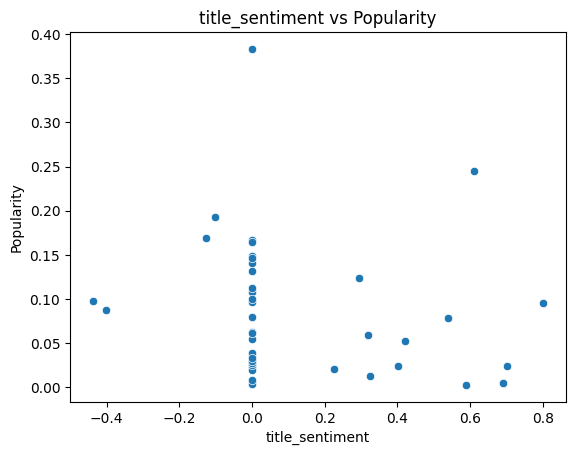

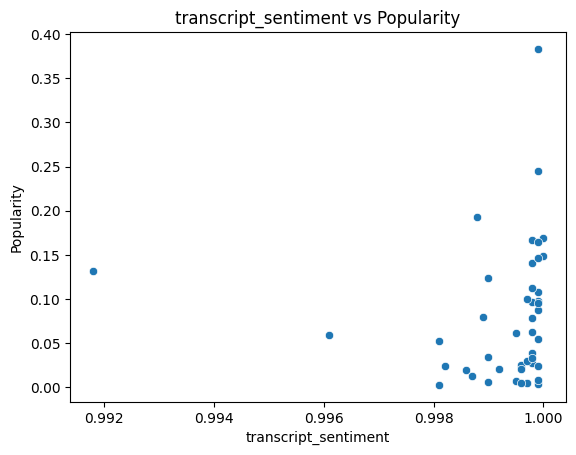

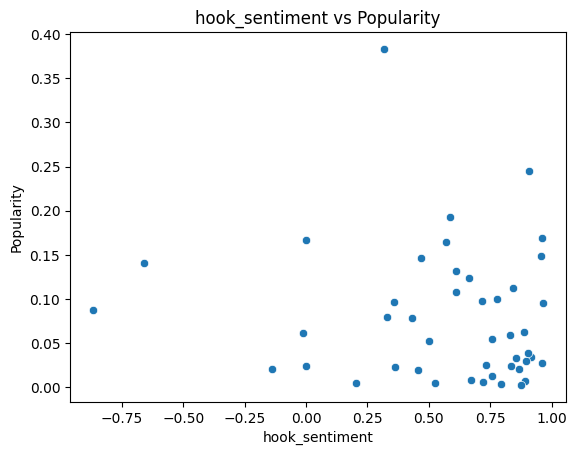

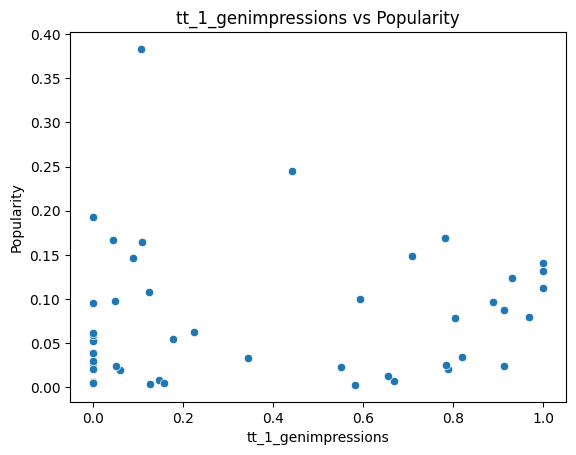

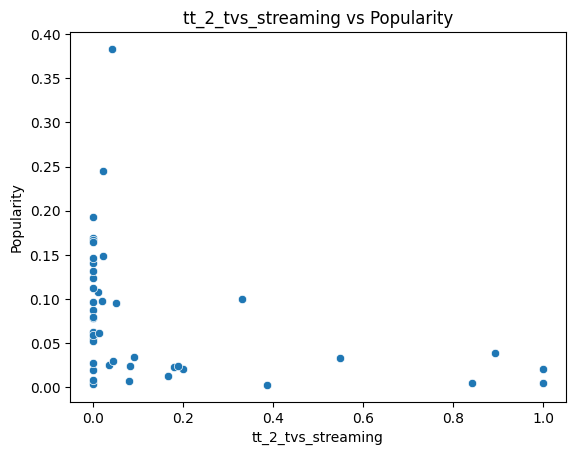

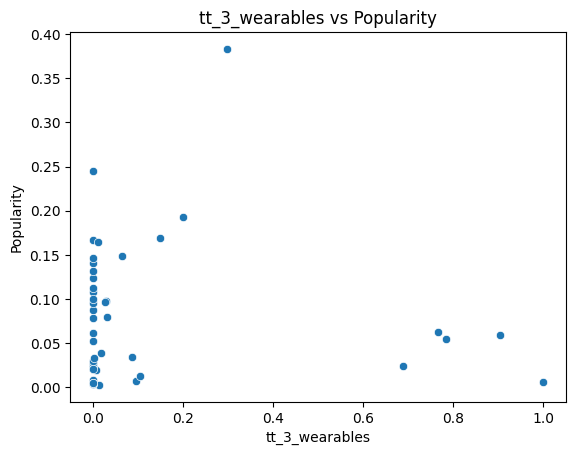

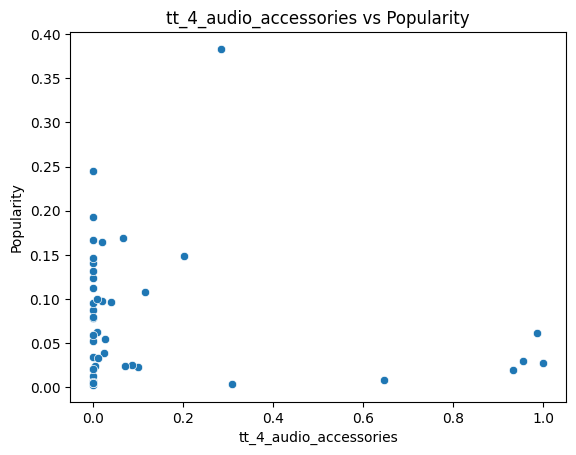

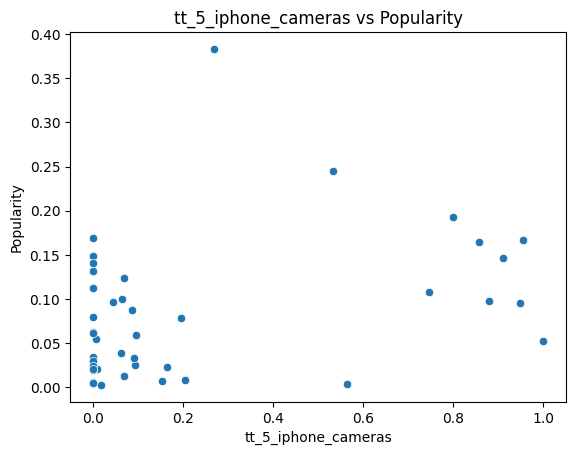

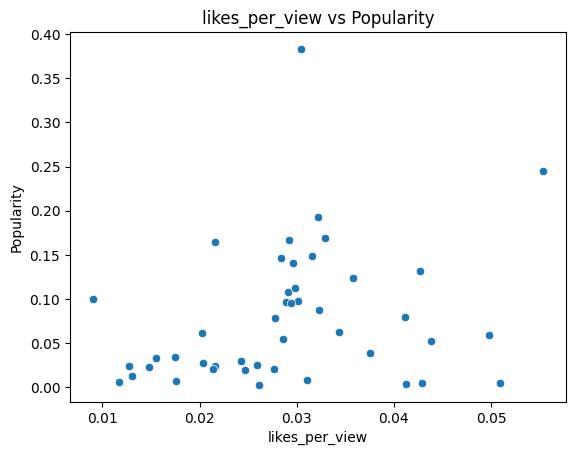

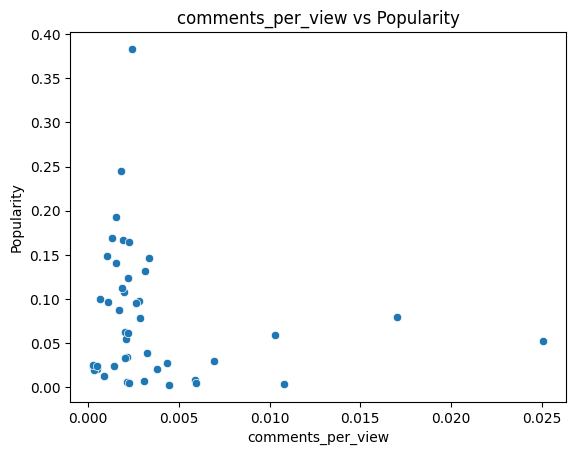

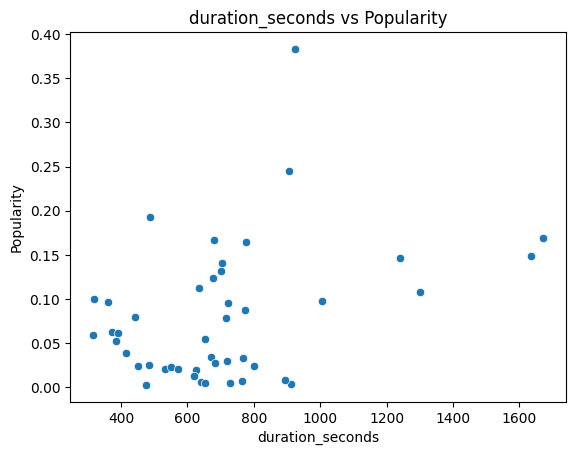

In [33]:
numerical_columns = [
    'title_sentiment', 'transcript_sentiment', 'hook_sentiment',
    'tt_1_genimpressions', 'tt_2_tvs_streaming', 'tt_3_wearables',
    'tt_4_audio_accessories', 'tt_5_iphone_cameras', 'likes_per_view', 
    'comments_per_view', 'duration_seconds'
]

for col in numerical_columns:
    sns.scatterplot(x=data[col], y=data['popularity'])
    plt.title(f'{col} vs Popularity')
    plt.xlabel(col)
    plt.ylabel('Popularity')
    plt.show()


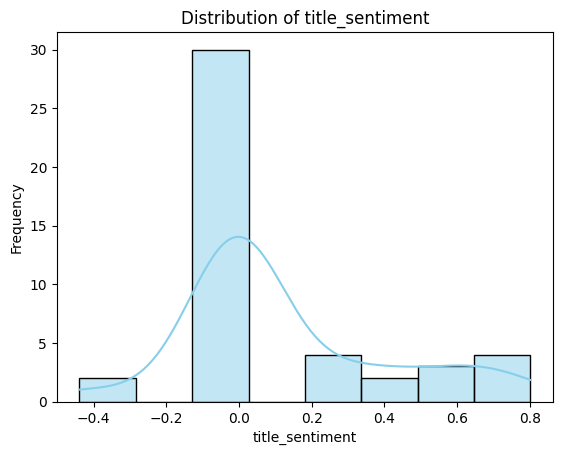

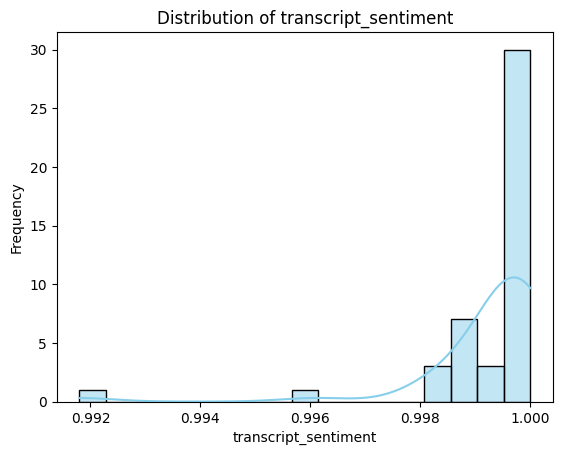

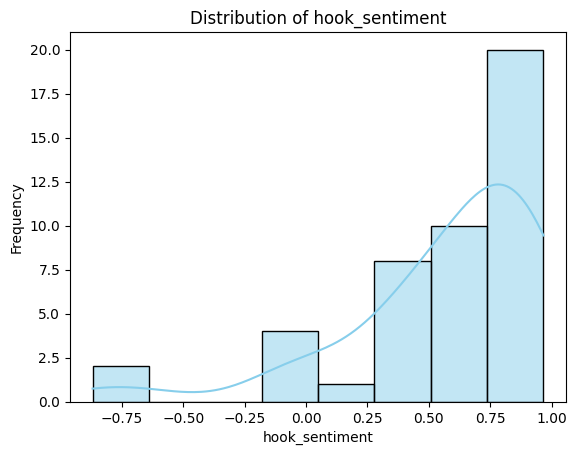

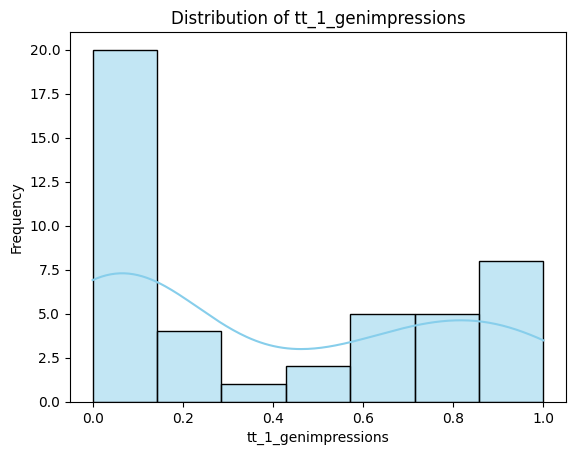

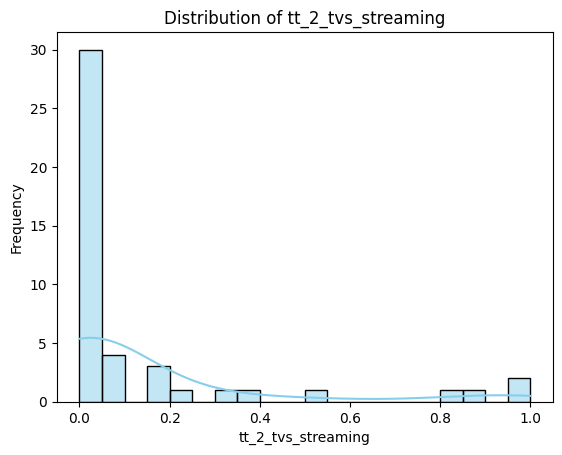

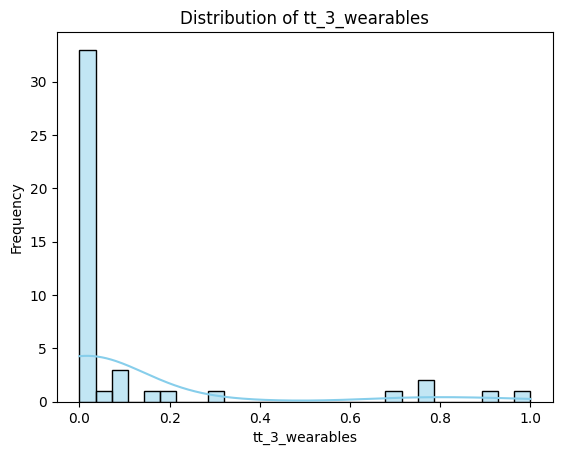

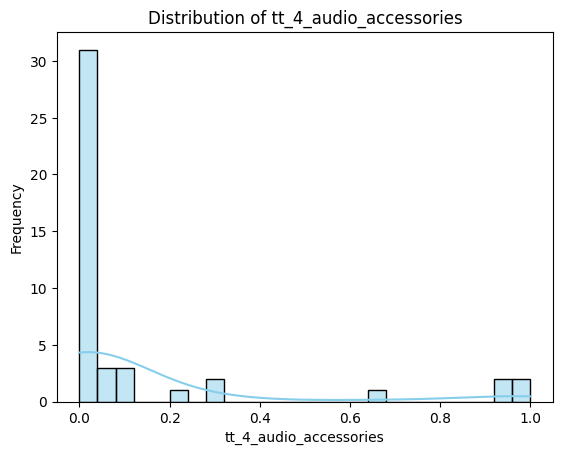

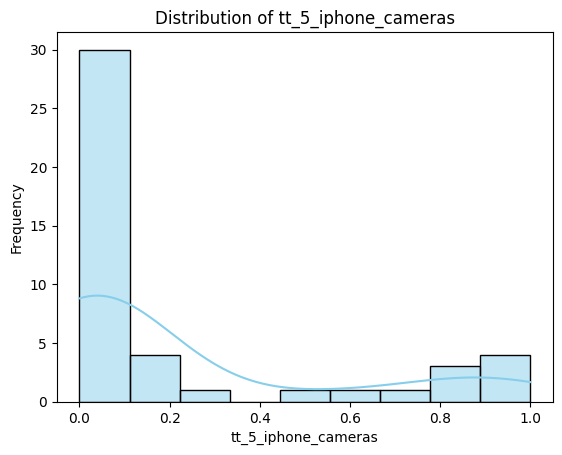

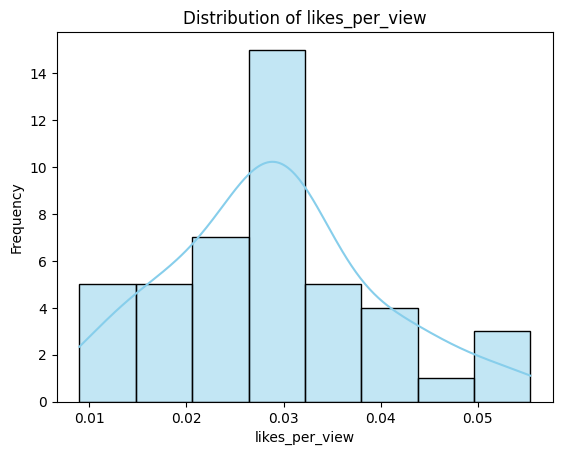

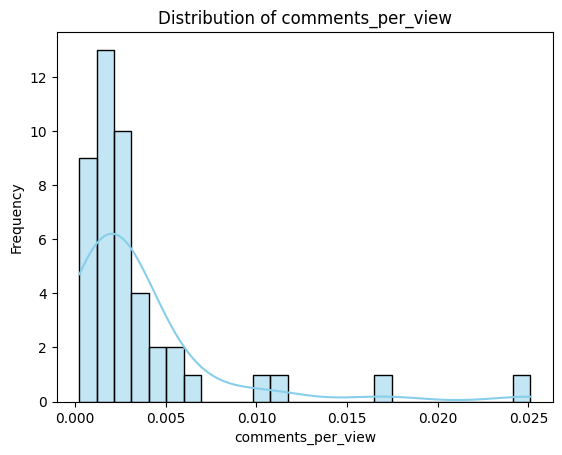

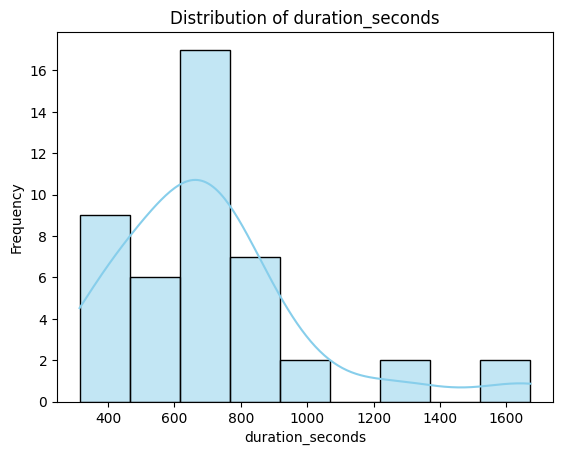

In [34]:
for col in numerical_columns:
    sns.histplot(data[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

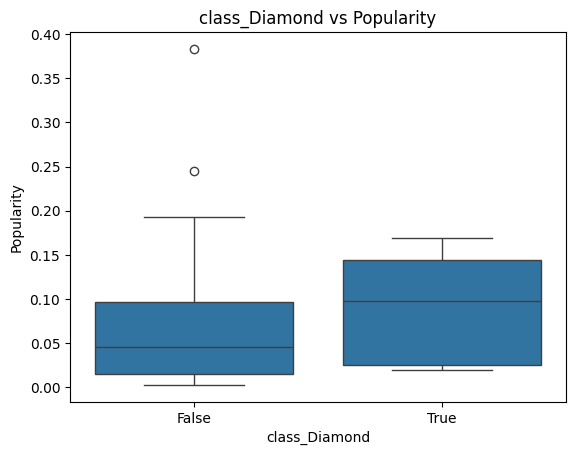

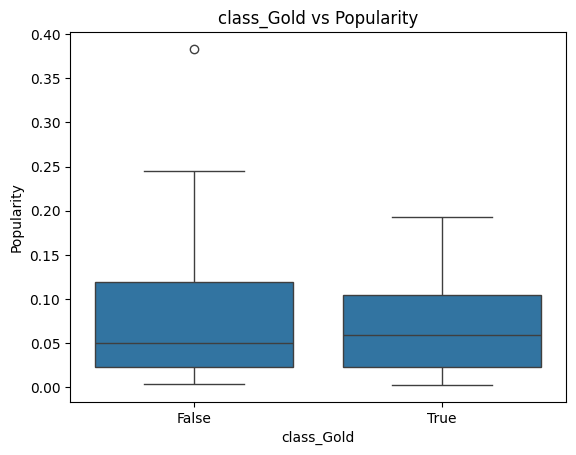

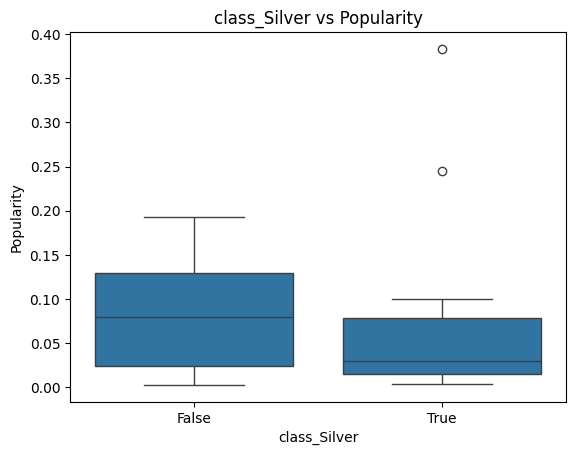

In [35]:
class_columns = ['class_Diamond', 'class_Gold', 'class_Silver']

for col in class_columns:
    sns.boxplot(x=data[col], y=data['popularity'])
    plt.title(f'{col} vs Popularity')
    plt.xlabel(col)
    plt.ylabel('Popularity')
    plt.show()


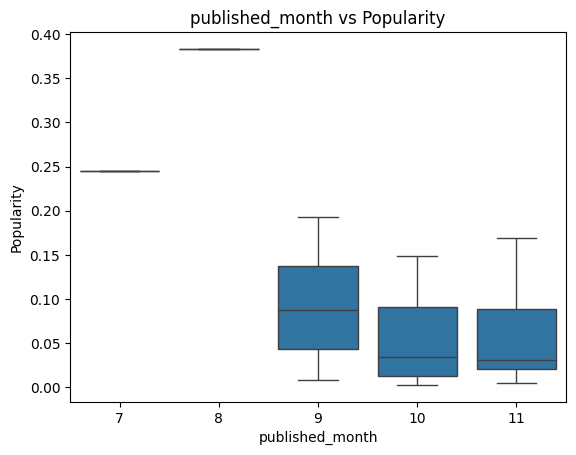

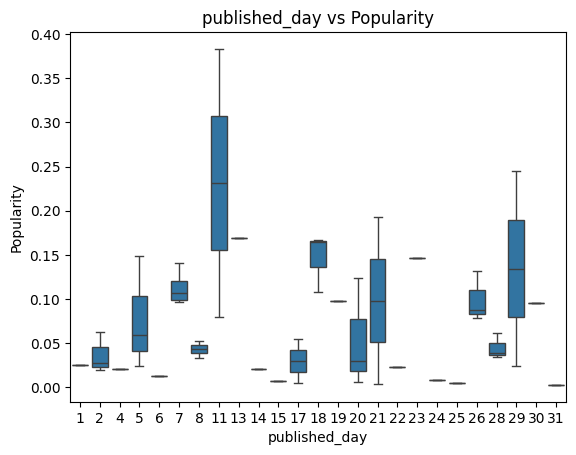

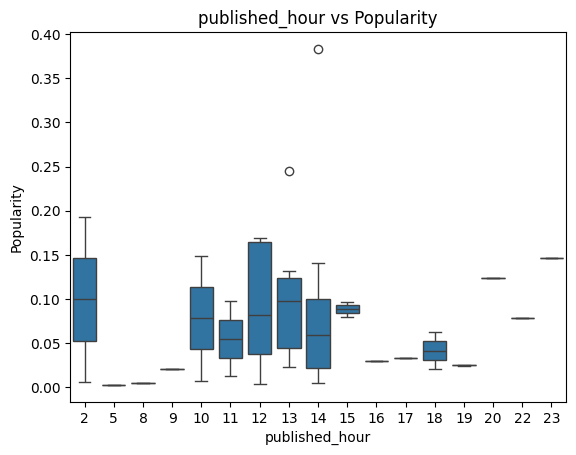

In [36]:
time_columns = ['published_month', 'published_day', 'published_hour']

for col in time_columns:
    sns.boxplot(x=data[col], y=data['popularity'])
    plt.title(f'{col} vs Popularity')
    plt.xlabel(col)
    plt.ylabel('Popularity')
    plt.show()

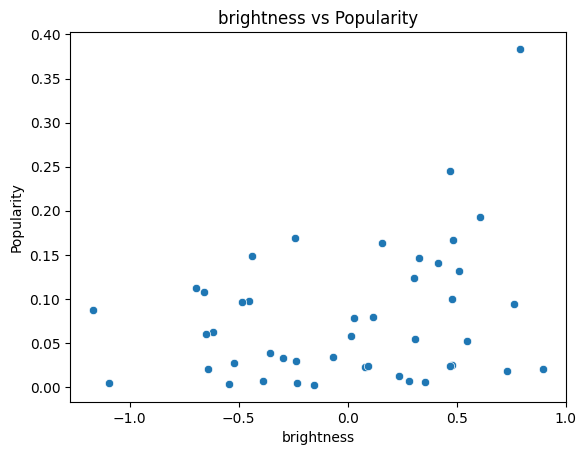

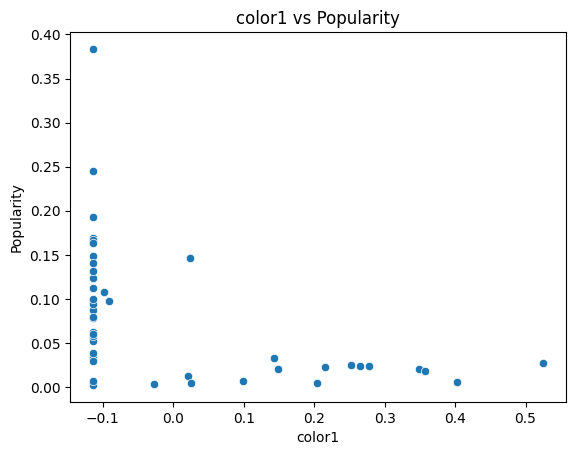

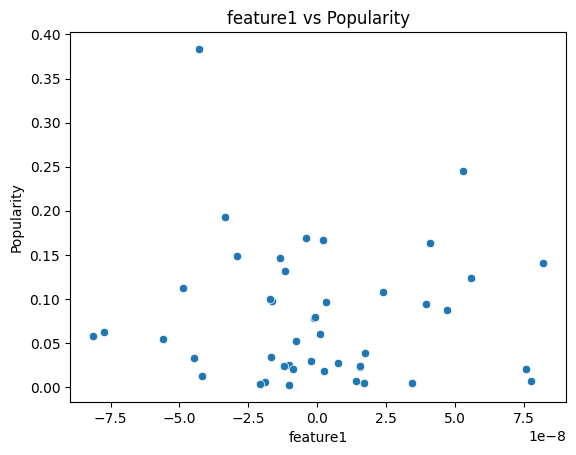

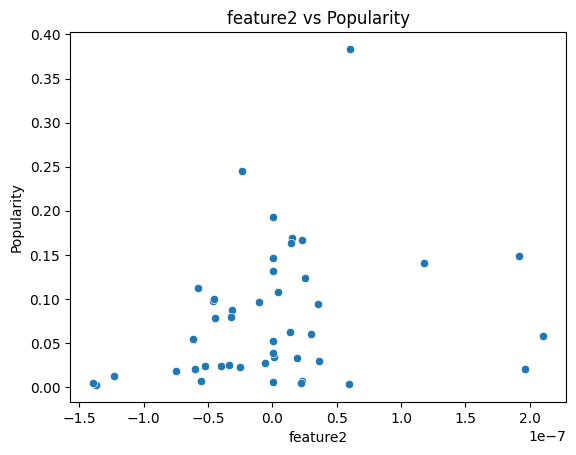

In [37]:
color_columns = ['brightness', 'color1', 'feature1', 'feature2']

for col in color_columns:
    sns.scatterplot(x=data[col], y=data['popularity'])
    plt.title(f'{col} vs Popularity')
    plt.xlabel(col)
    plt.ylabel('Popularity')
    plt.show()


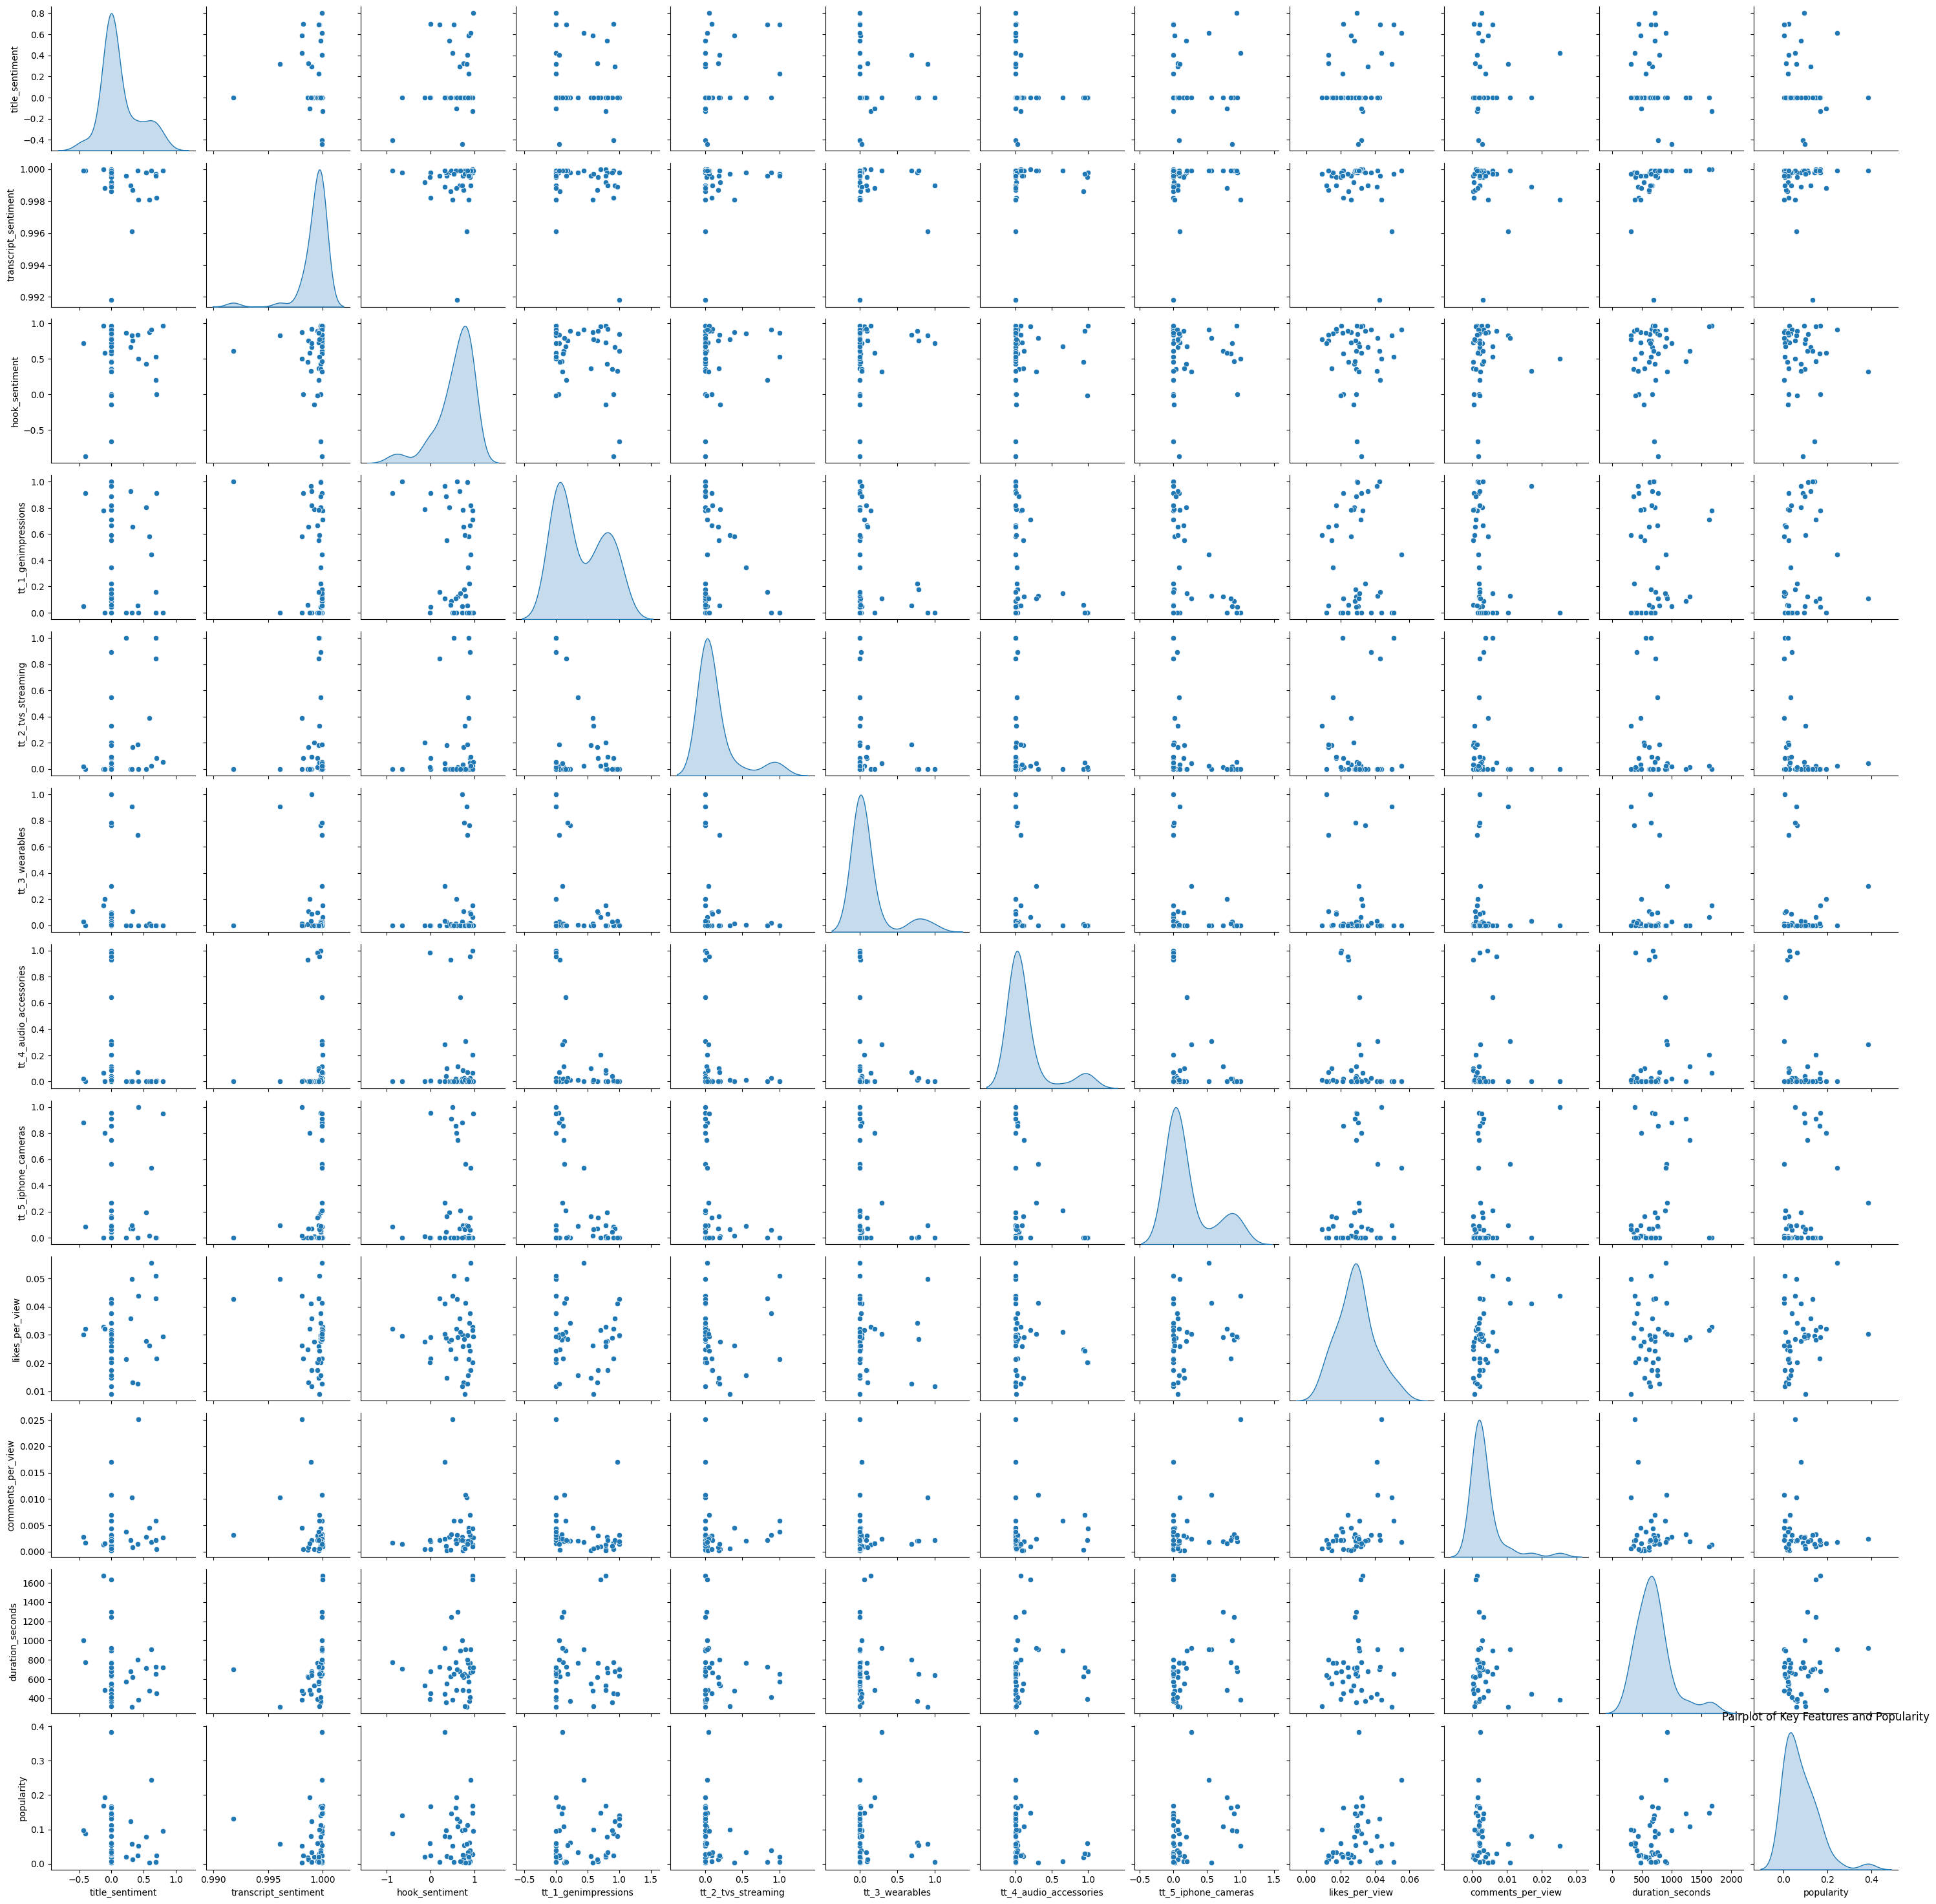

In [38]:
sns.pairplot(data, vars=numerical_columns + ['popularity'], diag_kind='kde')
plt.title('Pairplot of Key Features and Popularity')
plt.show()

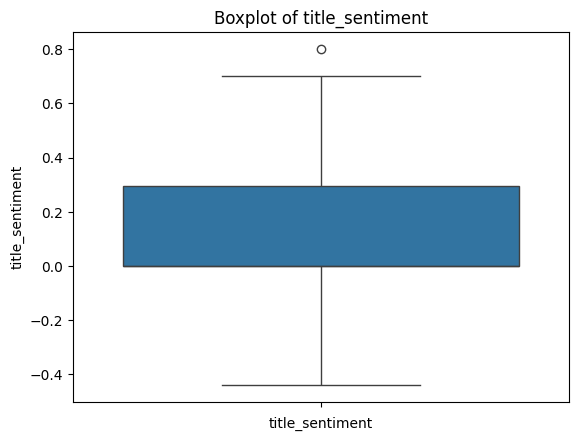

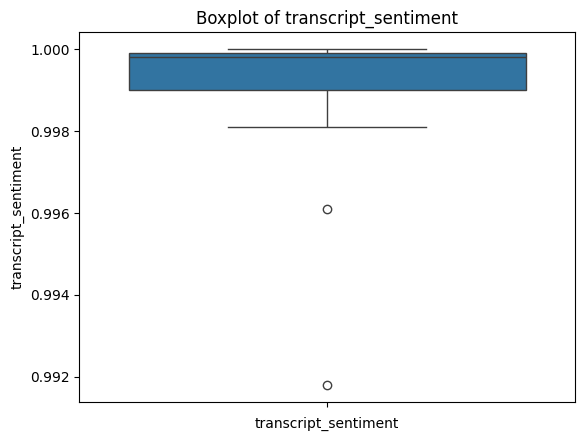

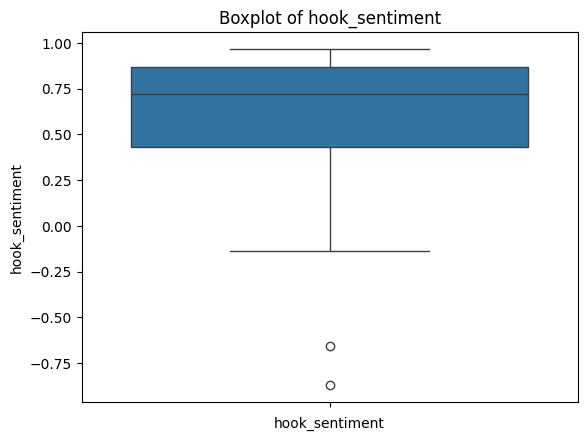

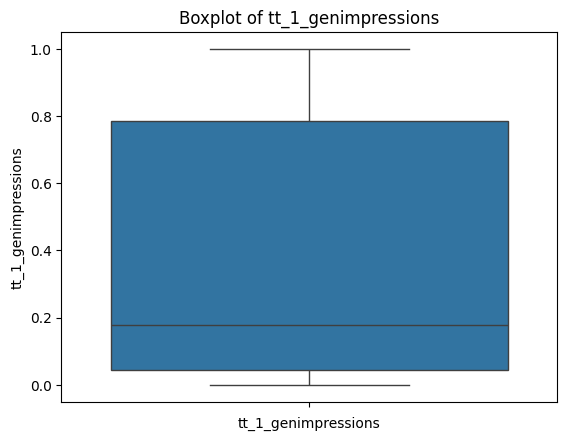

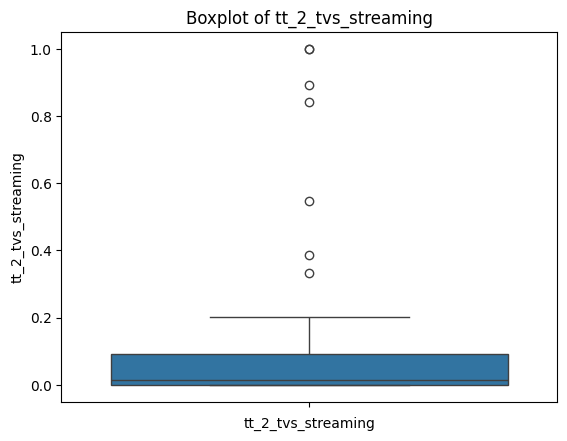

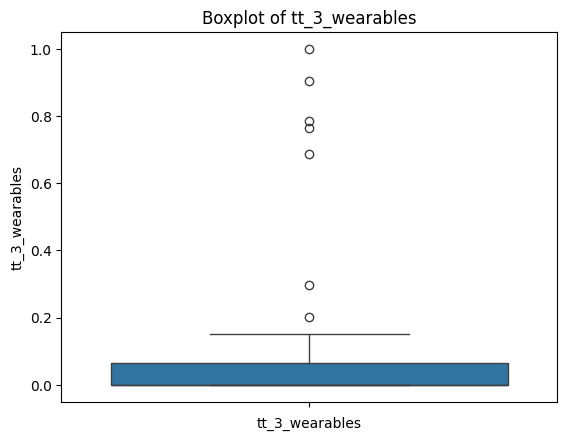

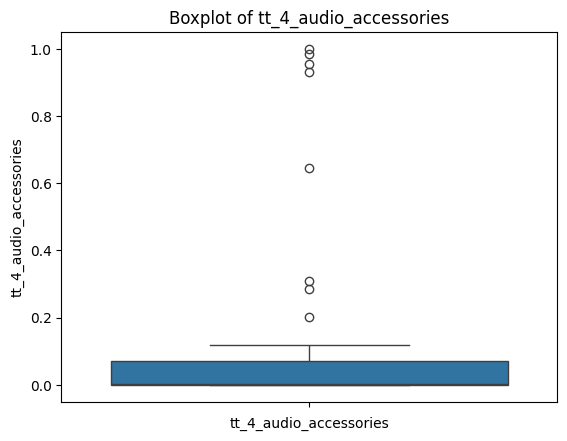

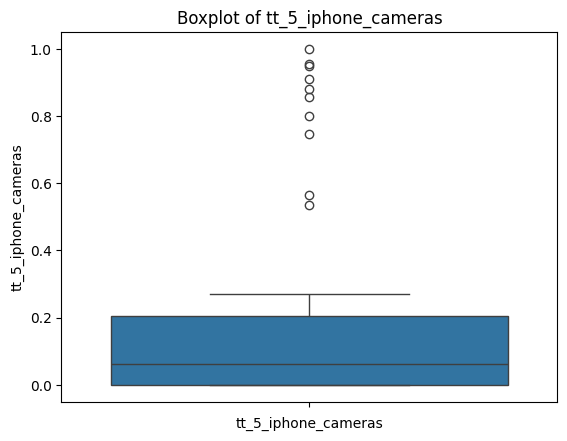

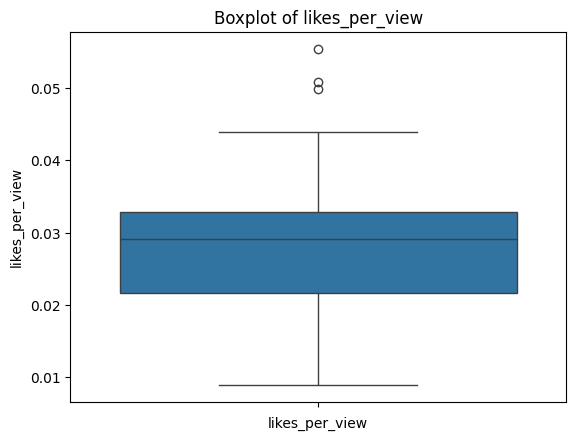

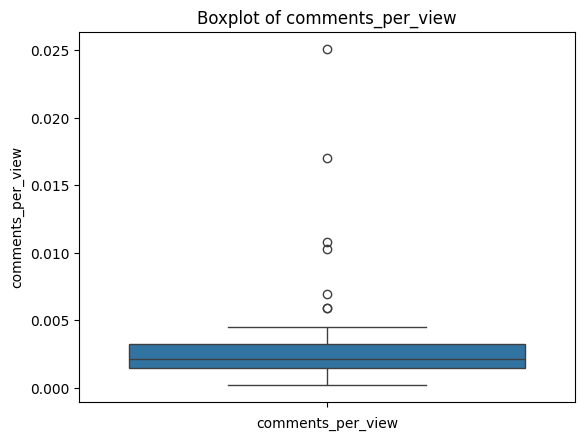

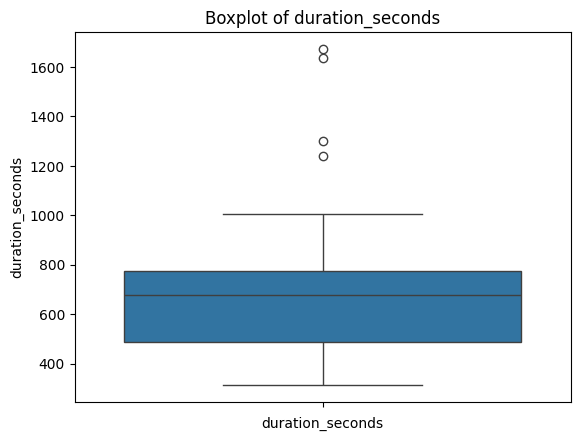

In [39]:
for col in numerical_columns:
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

In [40]:
print(data.describe().T)

                        count          mean           std           min  \
title_sentiment          45.0  1.231089e-01  2.812981e-01 -4.389000e-01   
transcript_sentiment     45.0  9.992667e-01  1.352943e-03  9.918000e-01   
hook_sentiment           45.0  5.691111e-01  4.120580e-01 -8.691000e-01   
tt_1_genimpressions      45.0  3.913230e-01  3.819501e-01  0.000000e+00   
tt_2_tvs_streaming       45.0  1.392852e-01  2.763113e-01  0.000000e+00   
tt_3_wearables           45.0  1.176112e-01  2.635731e-01  0.000000e+00   
tt_4_audio_accessories   45.0  1.318550e-01  2.878617e-01  0.000000e+00   
tt_5_iphone_cameras      45.0  2.199256e-01  3.379570e-01  0.000000e+00   
i_Portraits_Outdoor      45.0  1.073583e-01  7.876921e-02  1.770691e-02   
i_Office_Desk_Items      45.0  1.393511e-01  8.895368e-02  1.200715e-02   
i_Electronics_Repair     45.0  7.192549e-02  1.235984e-01  1.015786e-02   
i_Laptops_Workstations   45.0  6.609501e-02  1.045498e-01  1.444399e-03   
i_UI_Digital_Screens     

# Normalize Data

In [41]:
data = data.drop(columns=['published_month', 'published_day', 'published_hour'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                45 non-null     object 
 1   title_sentiment         45 non-null     float64
 2   transcript_sentiment    45 non-null     float64
 3   hook_sentiment          45 non-null     float64
 4   tt_1_genimpressions     45 non-null     float64
 5   tt_2_tvs_streaming      45 non-null     float64
 6   tt_3_wearables          45 non-null     float64
 7   tt_4_audio_accessories  45 non-null     float64
 8   tt_5_iphone_cameras     45 non-null     float64
 9   i_Portraits_Outdoor     45 non-null     float64
 10  i_Office_Desk_Items     45 non-null     float64
 11  i_Electronics_Repair    45 non-null     float64
 12  i_Laptops_Workstations  45 non-null     float64
 13  i_UI_Digital_Screens    45 non-null     float64
 14  i_Men_Accessories       45 non-null     floa

In [42]:
data.head()

,video_id,title_sentiment,transcript_sentiment,hook_sentiment,tt_1_genimpressions,tt_2_tvs_streaming,tt_3_wearables,tt_4_audio_accessories,tt_5_iphone_cameras,i_Portraits_Outdoor,i_Office_Desk_Items,i_Electronics_Repair,i_Laptops_Workstations,i_UI_Digital_Screens,i_Men_Accessories,i_Smartwatches_Devices,i_Tablet_Gaming,i_Smartphones_Handling,i_Handheld_Gadgets,i_Landscape_Decor,neutral_percent,happy_percent,sad_percent,angry_percent,brightness,color1,feature1,feature2,brightness feature1,brightness feature2,color1 feature1,color1 feature2,feature1 feature2,popularity,likes_per_view,comments_per_view,duration_seconds,class_Diamond,class_Gold,class_Silver
0,neIYdLysqlk,-0.1260,1.0000,0.9598,0.781448,0.000000,0.150271,0.068281,0.000000,0.144373,0.111729,0.049618,0.007595,0.074713,0.110112,0.009071,0.029046,0.087018,0.318479,0.058245,0.12,0.88,0.00,0.00,-0.239770,-0.114429,-3.876273e-09,1.540517e-08,0.418041,-0.074074,0.000003,-0.000009,-9.538513e-08,0.168686,0.032892,0.001331,1673,True,False,False
1,YX8ks42Azn8,-0.4019,0.9999,-0.8691,0.912694,0.000000,0.000000,0.000000,0.087306,0.175335,0.099880,0.040972,0.010550,0.099863,0.051743,0.019642,0.084691,0.146995,0.250905,0.019425,0.72,0.12,0.04,0.12,-1.169372,-0.114464,4.721309e-08,-3.161653e-08,-0.319212,0.004220,0.000016,0.000017,-9.732528e-09,0.087461,0.032256,0.001712,774,True,False,False
2,4RcThoRG46c,0.0000,1.0000,0.9552,0.708494,0.023958,0.064661,0.202886,0.000000,0.140951,0.194708,0.034888,0.043597,0.178386,0.132647,0.009894,0.041346,0.025141,0.166527,0.031916,0.40,0.60,0.00,0.00,-0.438078,-0.114436,-2.897799e-08,1.918911e-07,-0.357659,-1.813017,-0.000001,-0.000060,-4.644337e-07,0.148169,0.031592,0.001008,1635,True,False,False
3,vSIbvJB4WdI,-0.4389,0.9999,0.7184,0.050387,0.020822,0.028909,0.020463,0.879418,0.327336,0.044627,0.013596,0.006036,0.240204,0.122107,0.016070,0.020679,0.123044,0.068881,0.017420,0.84,0.04,0.00,0.12,-0.452847,-0.091420,-1.647635e-08,-4.606061e-08,-0.604829,0.016561,-0.022457,-0.001867,1.131000e-07,0.097184,0.030142,0.002801,1004,True,False,False
4,cRPBp2tRxFY,0.0000,0.9999,0.6124,0.124643,0.013059,0.000000,0.117100,0.745198,0.195492,0.107757,0.014325,0.030166,0.120749,0.097365,0.013171,0.024163,0.245295,0.113471,0.038047,0.80,0.08,0.00,0.12,-0.659880,-0.098710,2.388327e-08,4.298733e-09,-0.260476,0.232781,-0.010035,0.004450,3.702941e-08,0.108197,0.029148,0.001974,1300,True,False,False


In [43]:
# Identify numerical columns to normalize (excluding 'popularity')
numerical_columns = [
    col for col in data.columns 
    if data[col].dtype in ['float64', 'int64'] and col != 'popularity'
]

# Apply z-score normalization to the numerical columns
data[numerical_columns] = (data[numerical_columns] - data[numerical_columns].mean()) / data[numerical_columns].std()

# Models
- Linear Regression: Simple and interpretable, great as a baseline.
- Ridge Regression: Adds L2 regularization, which helps with multicollinearity and overfitting.
- Lasso Regression: Adds L1 regularization, useful for feature selection by shrinking less important coefficients to zero.
- Decision Tree Regressor: Non-linear model, captures complex relationships but can overfit.
- Random Forest Regressor: Ensemble of trees, reduces overfitting, and handles non-linear relationships well.
- XGBoost: Powerful ensemble technique that often performs well on structured data.

In [44]:
X = data.drop(columns=['video_id', 'popularity'])  # Drop non-numerical and target columns
y = data['popularity']

In [46]:
# Convert boolean columns to integers for modeling
X = X.astype(float)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Convert boolean columns to integers for modeling
X = X.astype(float)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.01),
    'Decision Tree Regressor': DecisionTreeRegressor(max_depth=5, random_state=42),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
}

In [50]:
# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    mse = mean_squared_error(y_test, y_pred)  # Compute MSE
    rmse = np.sqrt(mse)  # Compute RMSE
    results.append((name, mse, rmse))

In [51]:
results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'RMSE'])
results_df

,Model,MSE,RMSE
0,Linear Regression,0.070599,0.265704
1,Ridge Regression,0.010570,0.102811
2,Lasso Regression,0.002737,0.052312
3,Decision Tree Regressor,0.007214,0.084937
4,Random Forest Regressor,0.004918,0.070127


# feature Importances

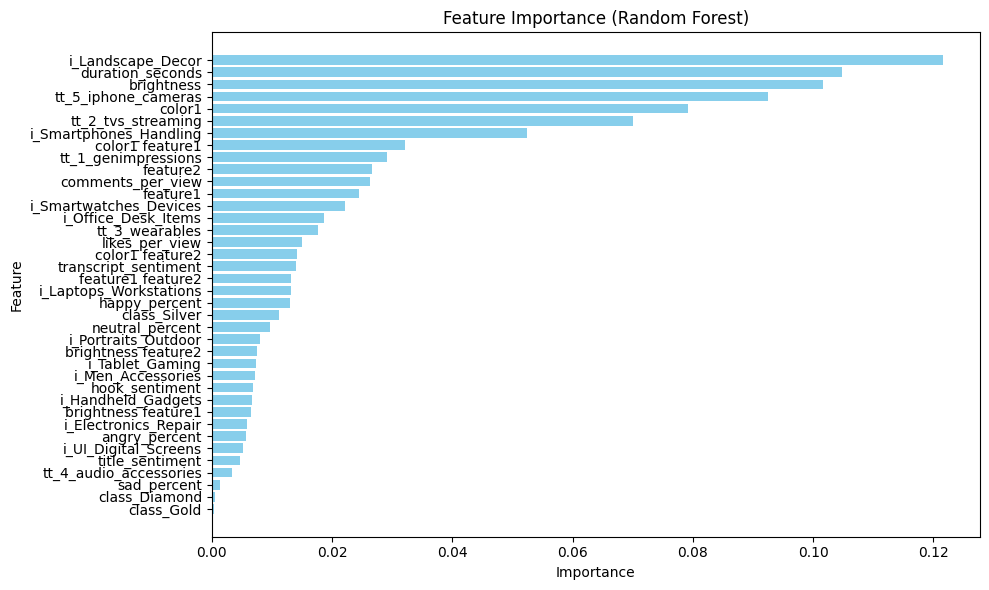

In [55]:
# Feature Importance for Random Forest
rf_model = models['Random Forest Regressor']
rf_importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_importances})

# Sort the DataFrame by importance in descending order
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot Sorted Feature Importances
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='skyblue')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance on top
plt.tight_layout()
plt.show()

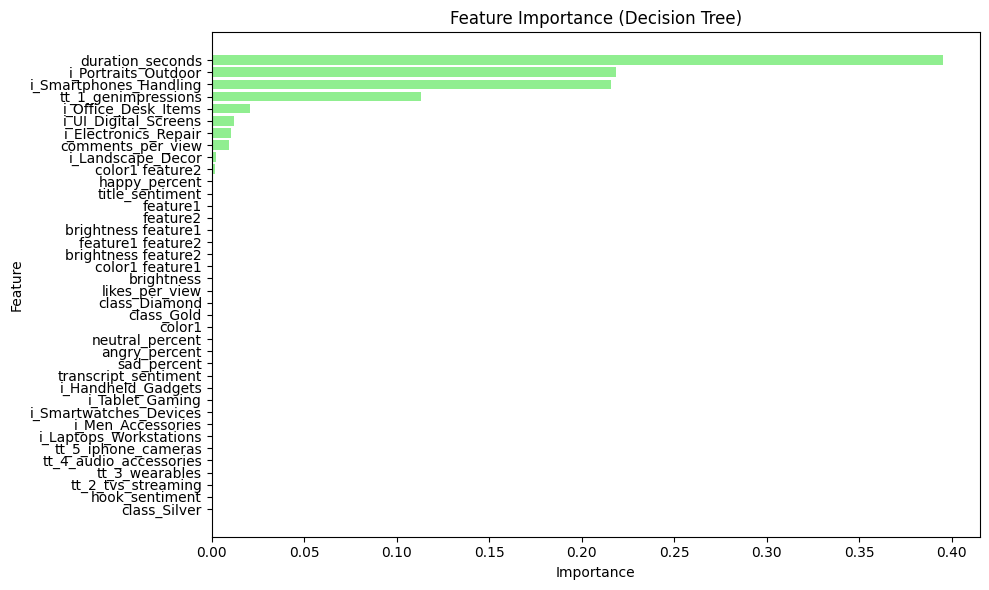

In [57]:
# Feature Importance for Decision Tree
dt_model = models['Decision Tree Regressor']
dt_importances = dt_model.feature_importances_

# Create a DataFrame for feature importances
dt_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': dt_importances})

# Sort the DataFrame by importance in descending order
dt_importances_df = dt_importances_df.sort_values(by='Importance', ascending=False)

# Plot Sorted Feature Importances
plt.figure(figsize=(10, 6))
plt.barh(dt_importances_df['Feature'], dt_importances_df['Importance'], color='lightgreen')
plt.title('Feature Importance (Decision Tree)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance on top
plt.tight_layout()
plt.show()


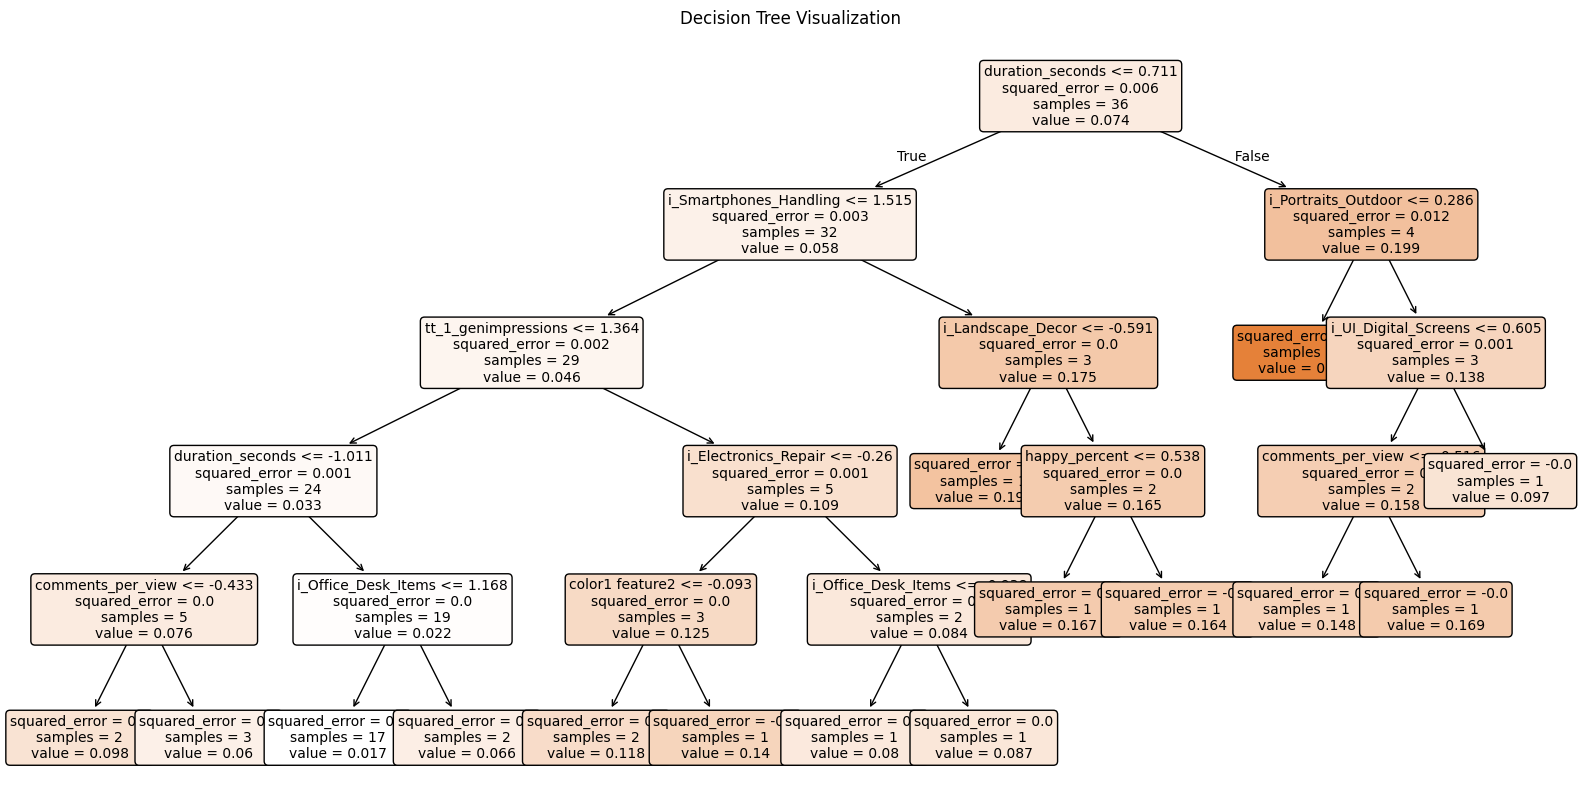

In [58]:
from sklearn.tree import plot_tree
# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title('Decision Tree Visualization')
plt.show()

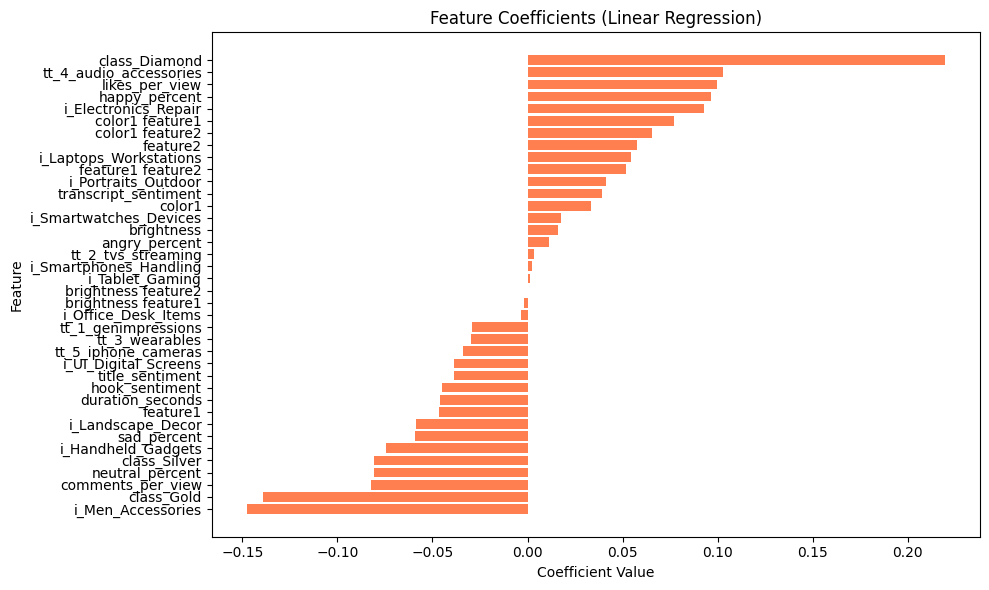

In [59]:
# Coefficients for Linear Regression
lr_model = models['Linear Regression']
lr_coefficients = lr_model.coef_

# Create a DataFrame for coefficients
lr_coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_coefficients})

# Sort the DataFrame by coefficient values in descending order (absolute values for impact)
lr_coefficients_df = lr_coefficients_df.sort_values(by='Coefficient', ascending=False)

# Plot Sorted Coefficients
plt.figure(figsize=(10, 6))
plt.barh(lr_coefficients_df['Feature'], lr_coefficients_df['Coefficient'], color='coral')
plt.title('Feature Coefficients (Linear Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Invert y-axis to have the largest coefficients on top
plt.tight_layout()
plt.show()

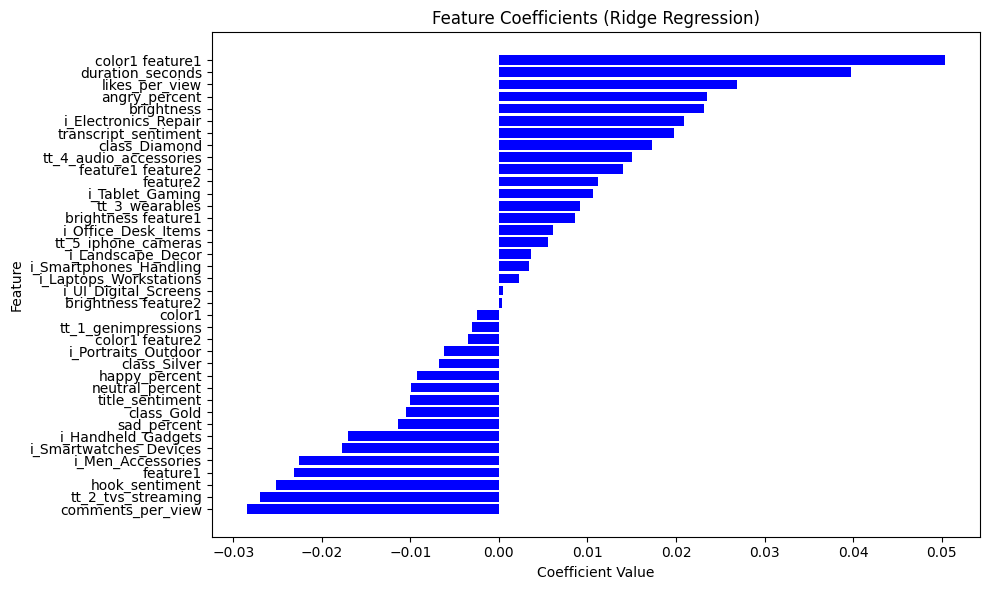

In [60]:
# Coefficients for Ridge Regression
ridge_model = models['Ridge Regression']
ridge_coefficients = ridge_model.coef_

# Create a DataFrame for coefficients
ridge_coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': ridge_coefficients})

# Sort the DataFrame by coefficient values in descending order (absolute values for impact)
ridge_coefficients_df = ridge_coefficients_df.sort_values(by='Coefficient', ascending=False)

# Plot Sorted Coefficients
plt.figure(figsize=(10, 6))
plt.barh(ridge_coefficients_df['Feature'], ridge_coefficients_df['Coefficient'], color='blue')
plt.title('Feature Coefficients (Ridge Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Invert y-axis to have the largest coefficients on top
plt.tight_layout()
plt.show()

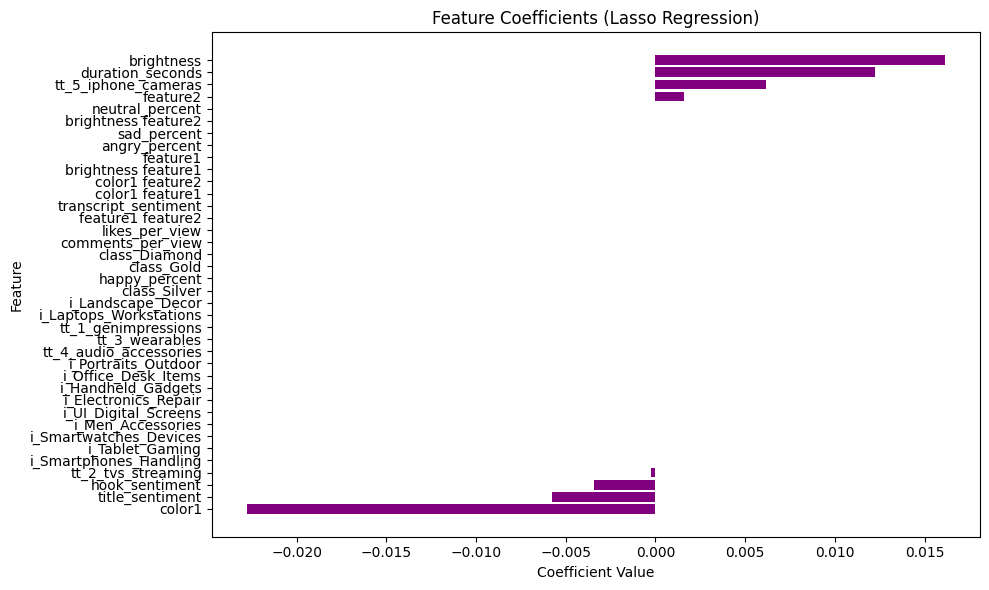

In [61]:
# Coefficients for Lasso Regression
lasso_model = models['Lasso Regression']
lasso_coefficients = lasso_model.coef_

# Create a DataFrame for coefficients
lasso_coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_coefficients})

# Sort the DataFrame by coefficient values in descending order (absolute values for impact)
lasso_coefficients_df = lasso_coefficients_df.sort_values(by='Coefficient', ascending=False)

# Plot Sorted Coefficients
plt.figure(figsize=(10, 6))
plt.barh(lasso_coefficients_df['Feature'], lasso_coefficients_df['Coefficient'], color='purple')
plt.title('Feature Coefficients (Lasso Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Invert y-axis to have the largest coefficients on top
plt.tight_layout()
plt.show()